In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import plot_roc_curve

In [2]:
data = pd.read_csv("/kaggle/input/superstore-marketing-campaign-dataset/superstore_data.csv")

In [3]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.shape

(2240, 22)

# **no missing data except income** 

In [6]:
data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [7]:
data=data.dropna(subset=['Income'])

In [8]:
data.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [9]:
data.shape

(2216, 22)

In [10]:
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.009477
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.096907
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


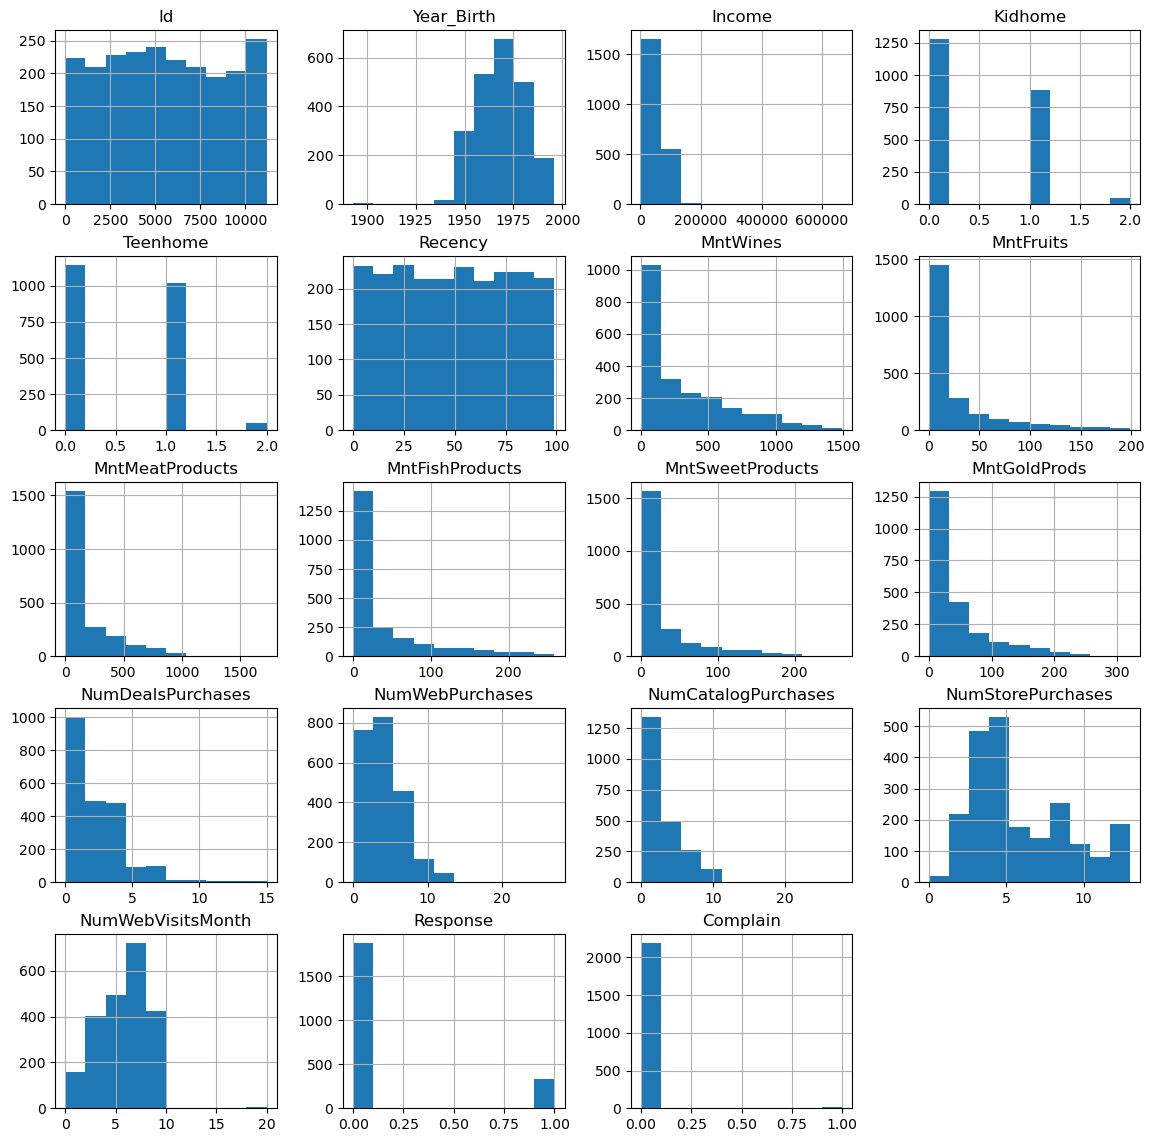

In [11]:
data.hist(figsize=(14,14))
plt.show()

In [12]:
df=data.copy()

In [13]:
df['Response']= df['Response'].astype('str')

In [14]:
df['Response'] = df['Response'].replace(['1'], 'Accept')
df['Response'] = df['Response'].replace(['0'], 'Refuse')

In [15]:
df['Complain']= df['Complain'].astype('str')
df['Complain'] = df['Complain'].replace(['1'], 'Yes')
df['Complain'] = df['Complain'].replace(['0'], 'No')

In [16]:
df['Response'].value_counts()

Refuse    1883
Accept     333
Name: Response, dtype: int64

# **Income range** 

<AxesSubplot:xlabel='Income'>

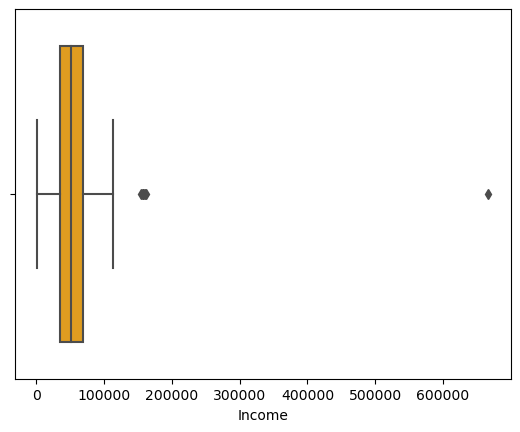

In [17]:

sns.boxplot(x = data.Income,
            color = "orange")

# **Income range for people refuse and accept the offer** 

<AxesSubplot:xlabel='Response', ylabel='Income'>

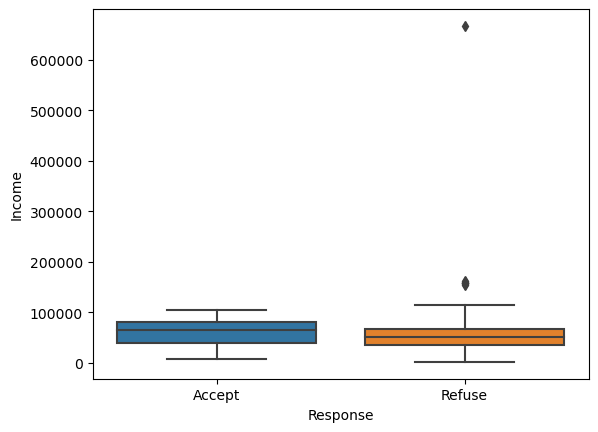

In [18]:
sns.boxplot(y = df.Income,
            x = df.Response)

# **The percentege of people campaign in last 2 years** 

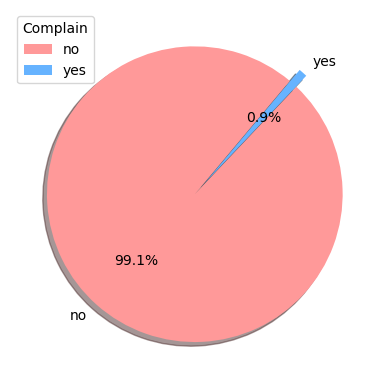

In [19]:
plt.pie(df['Complain'].value_counts(),labels=['no','yes'],autopct='%1.1f%%',shadow=True, startangle=50,explode=(0, 0.1),colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
)

plt.legend(title = "Complain")
plt.show() 


# **The percentege of people responded to markting campaign in last 2 years** 


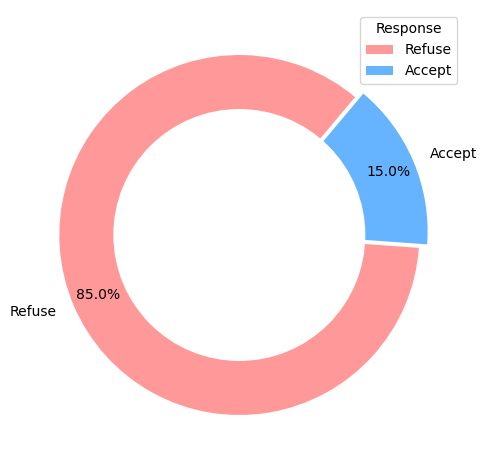

In [20]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.00,0.05)
labels = ['Refuse','Accept']
plt.pie(df['Response'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', startangle=50, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(title = "Response")

plt.tight_layout()
plt.show()

In [21]:
featurs_list=['Education','Marital_Status','Kidhome','Teenhome','Complain']

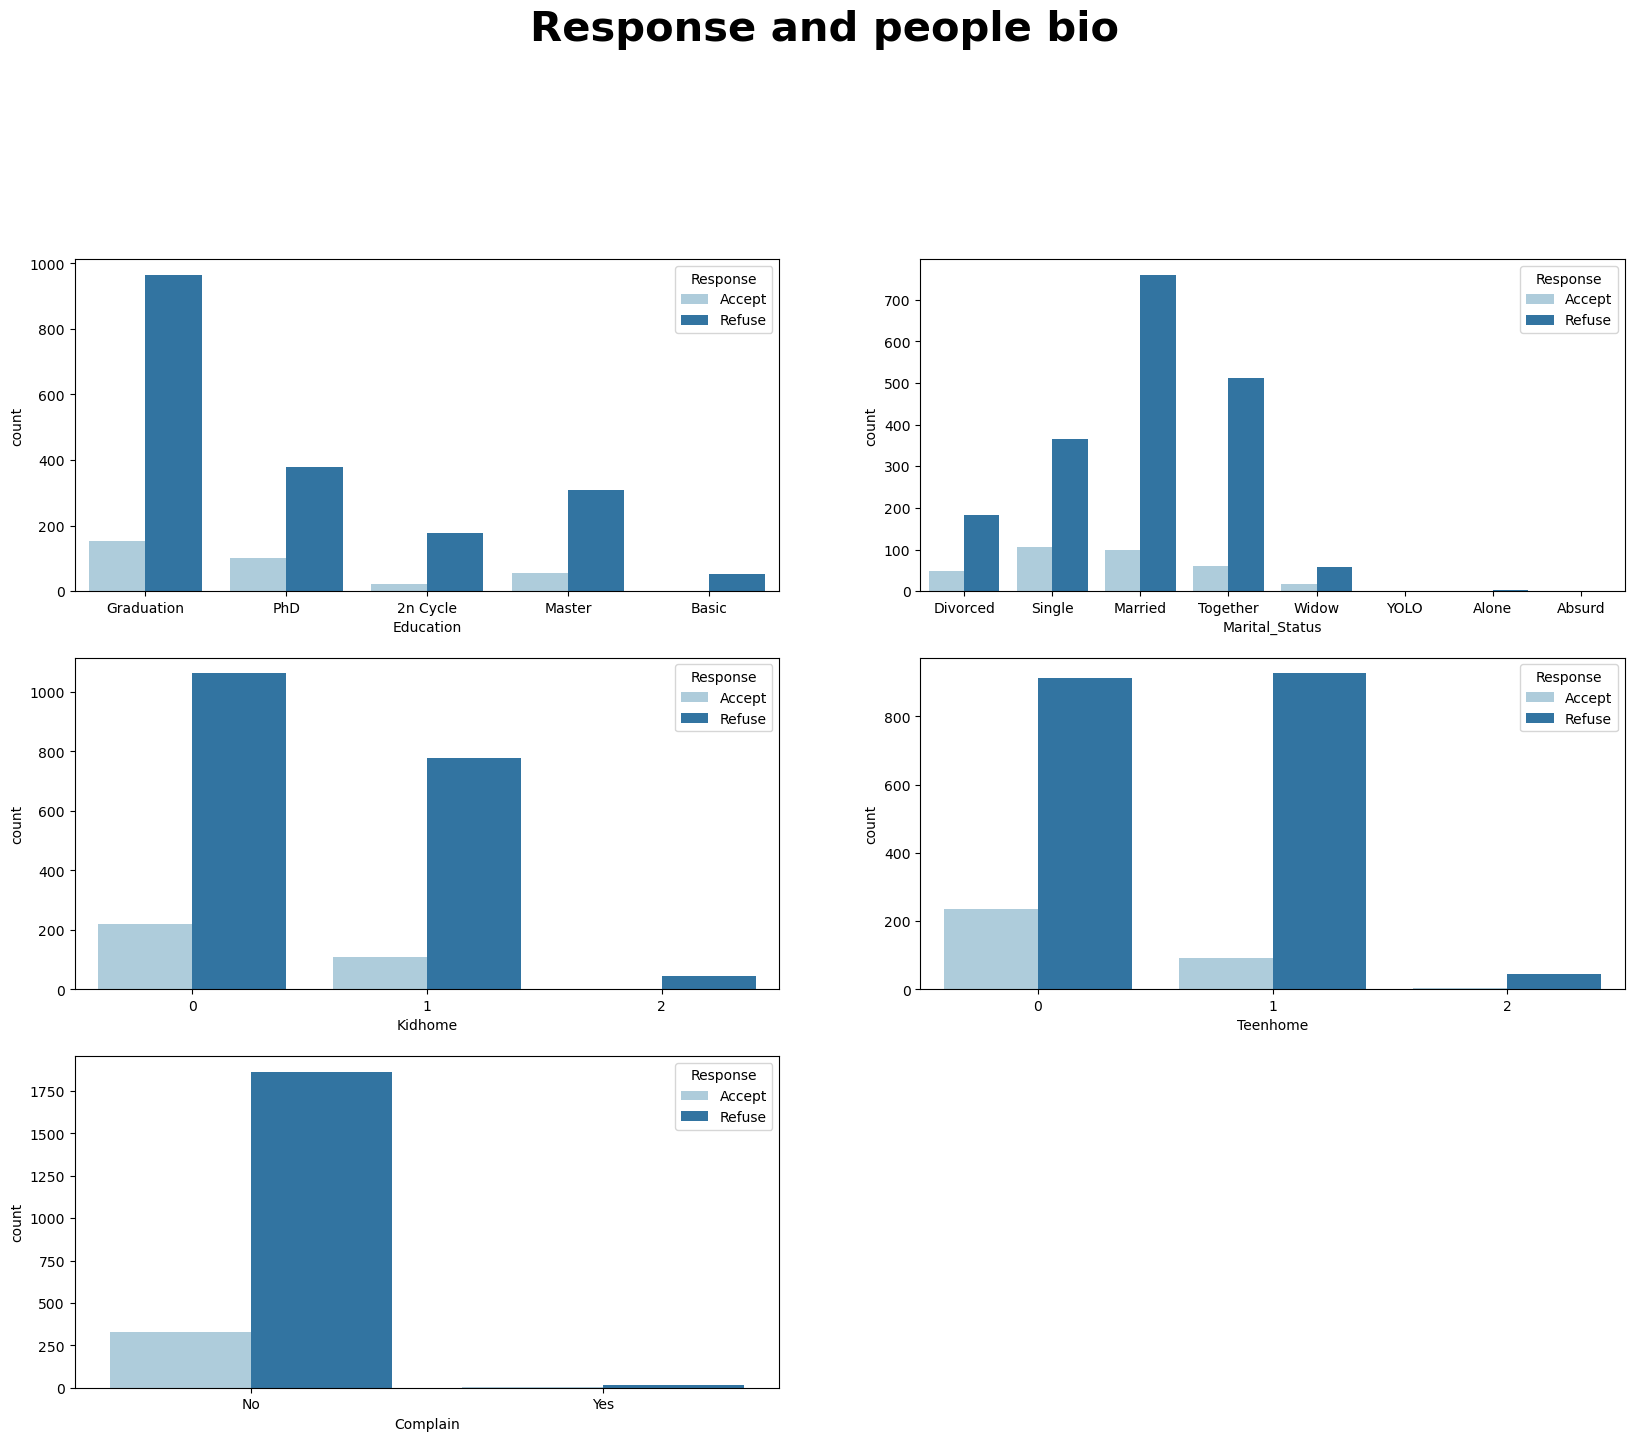

In [22]:
plt.figure(figsize = (20, 25))
plt.suptitle("Response and people bio",fontweight="bold", fontsize=30)
for i in range(len(featurs_list)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = featurs_list[i], hue = 'Response', palette = 'Paired', data = df)

In [23]:
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [24]:
featurs2_list=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

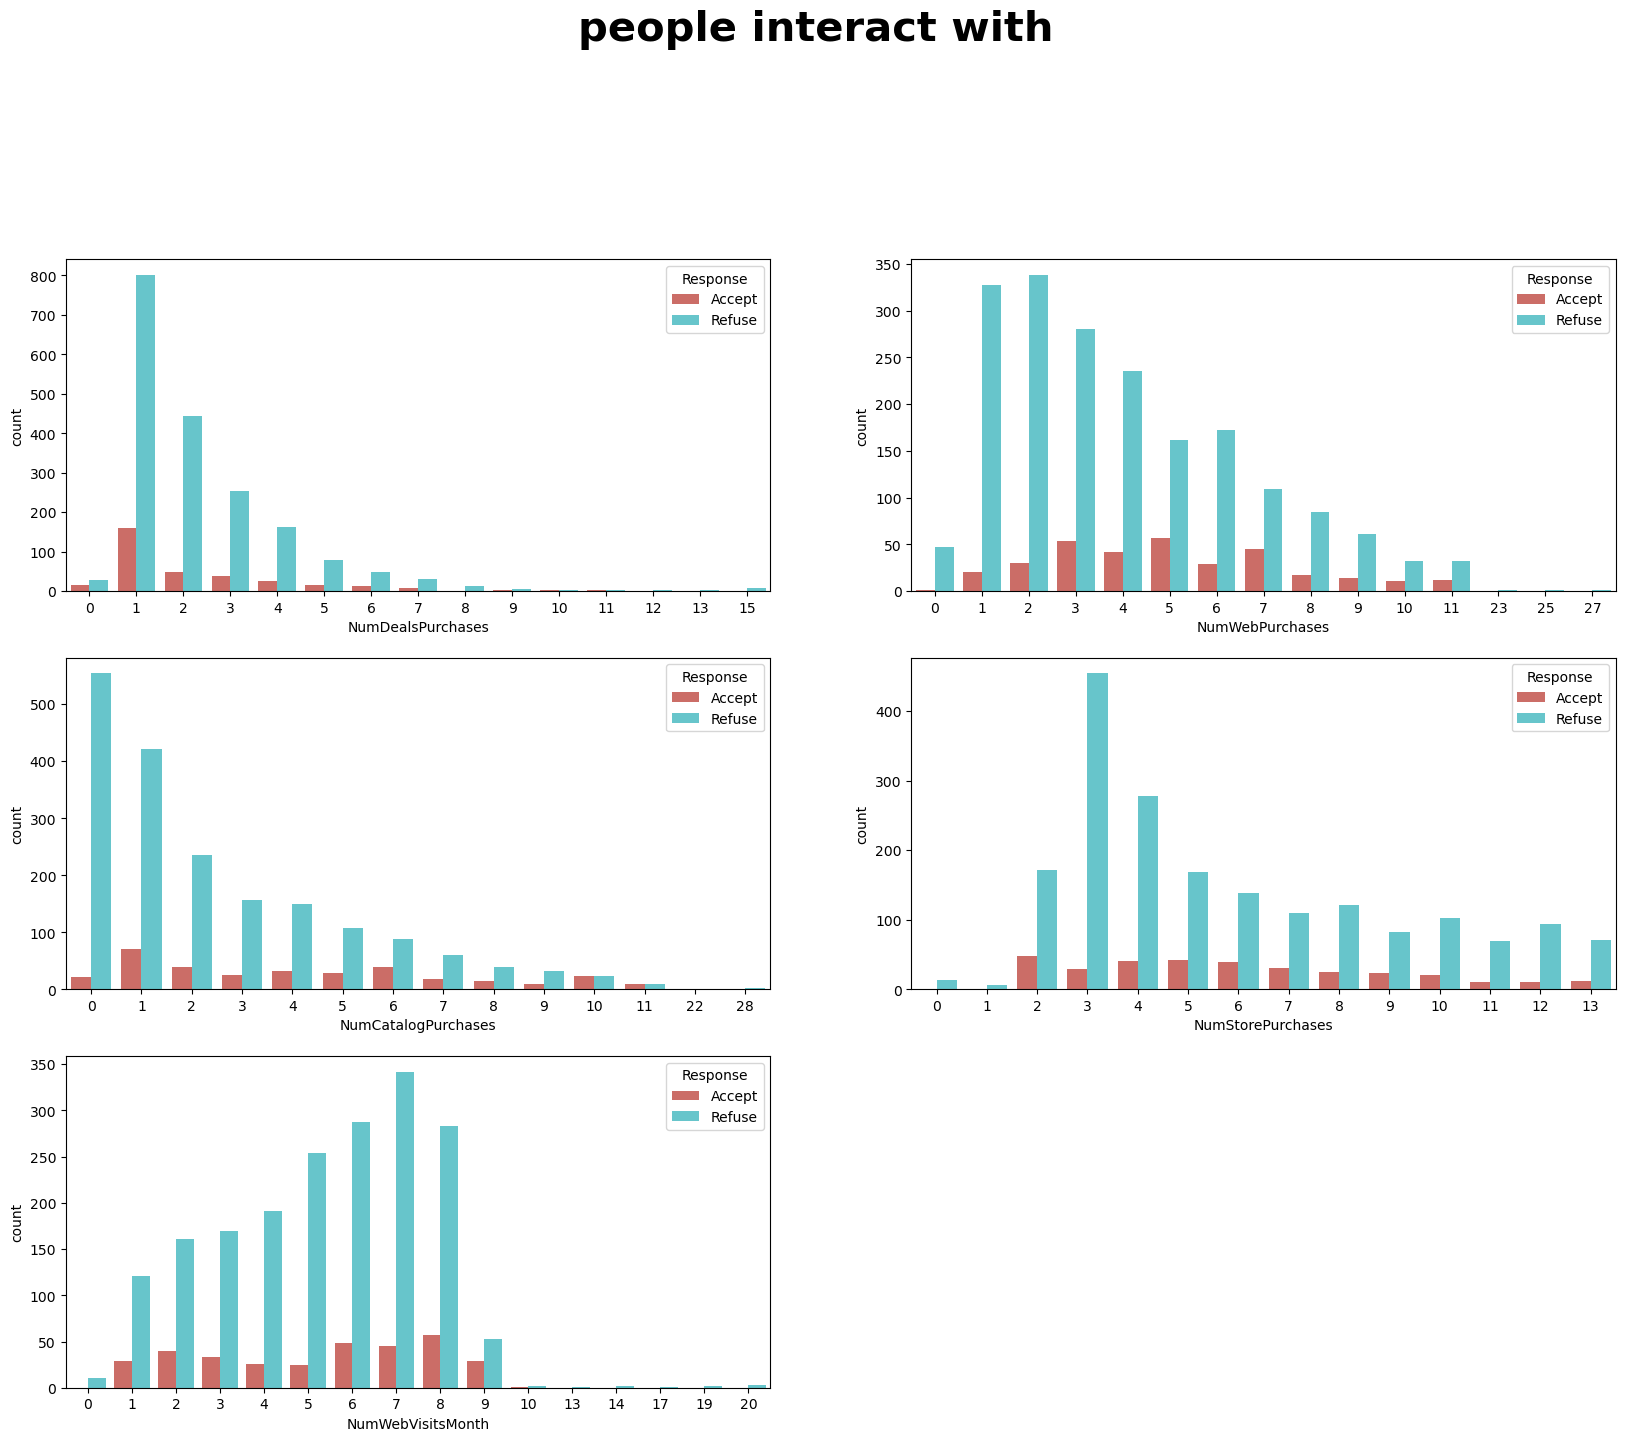

In [25]:
plt.figure(figsize = (20, 25))
plt.suptitle("people interact with",fontweight="bold", fontsize=30)
for i in range(len(featurs2_list)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = featurs2_list[i], hue = 'Response', palette = 'hls', data = df)

**Most method that people interact with is web** 

In [26]:
featurs3_list=['MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds']

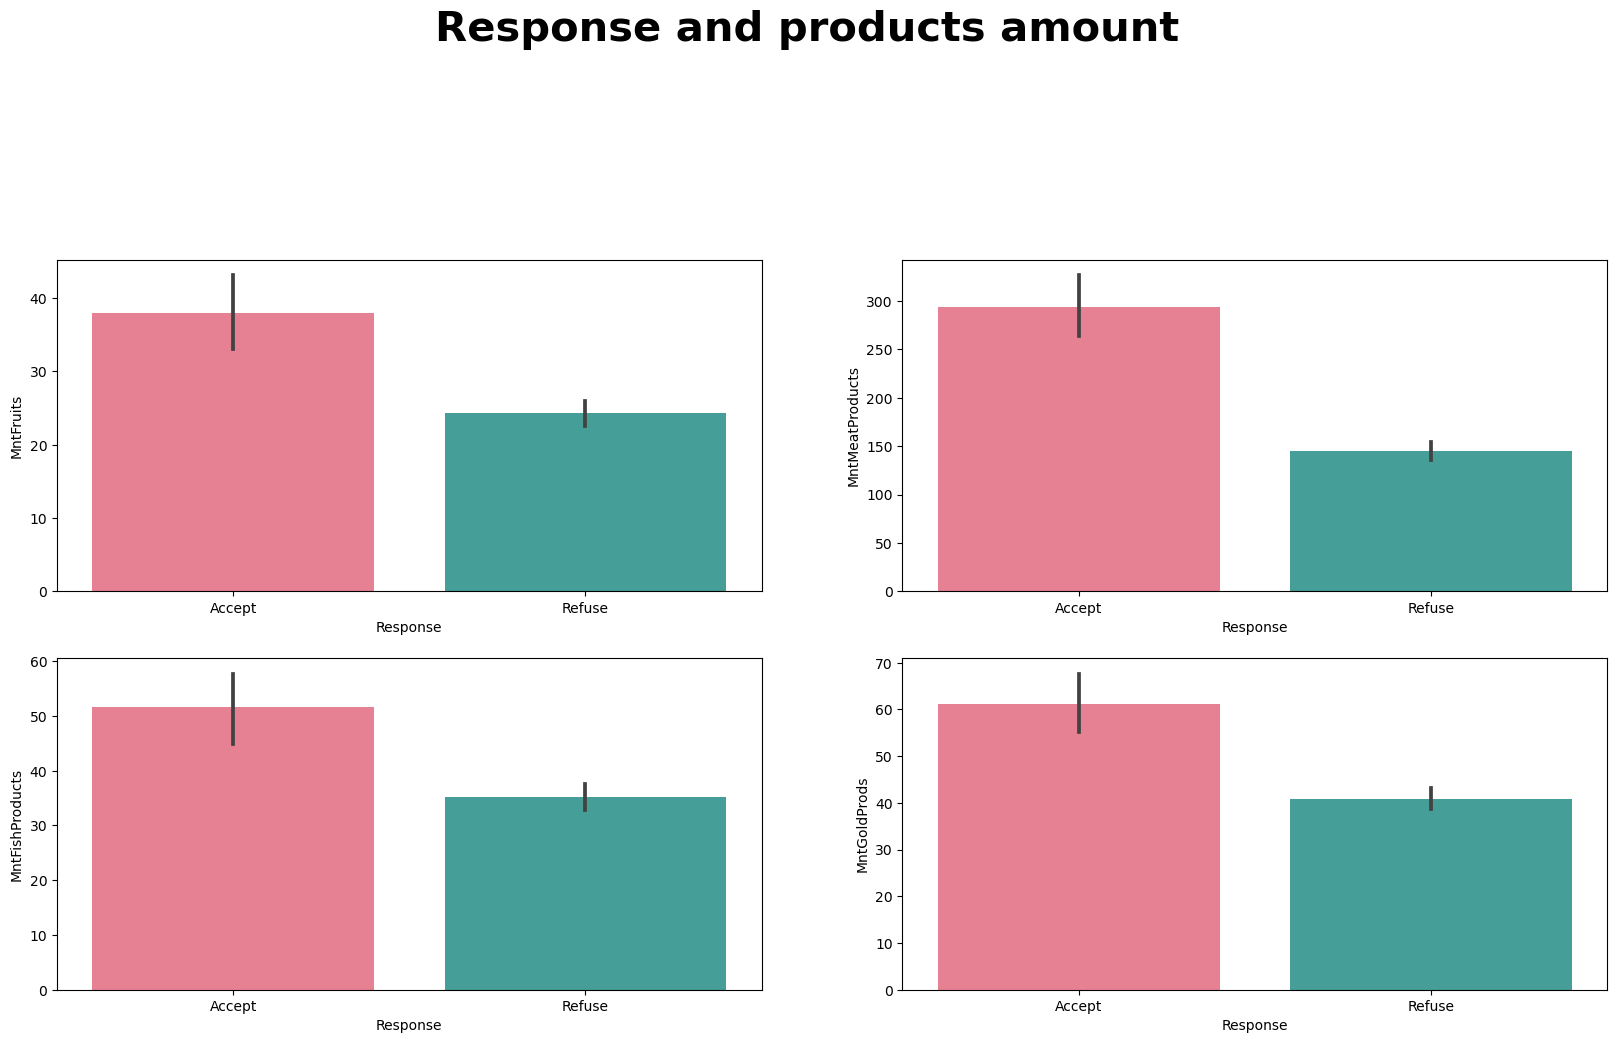

In [27]:
plt.figure(figsize = (20, 25))
plt.suptitle("Response and products amount",fontweight="bold", fontsize=30)
for i in range(len(featurs3_list)):
    plt.subplot(5,2,i+1)
    sns.barplot(y = featurs3_list[i], x = 'Response' ,  palette = 'husl', data = df)

**Here people respons with markting campaign get more produacts amount than they don't** 

# **number of days since the last purchase**

<AxesSubplot:xlabel='Recency', ylabel='Count'>

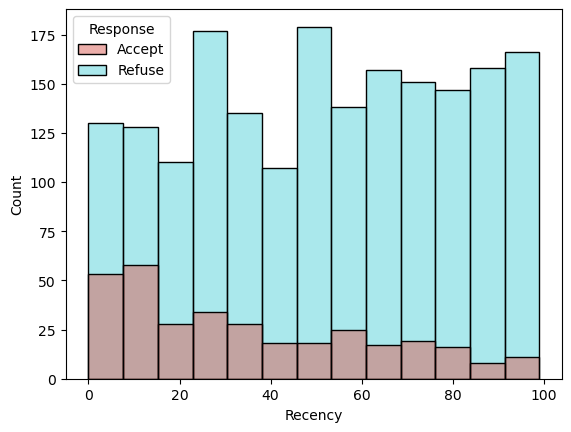

In [28]:

sns.histplot(x = 'Recency', hue = 'Response', palette = 'hls', data = df)

**the Recency decreases while the response increases**

<AxesSubplot:xlabel='Income', ylabel='Count'>

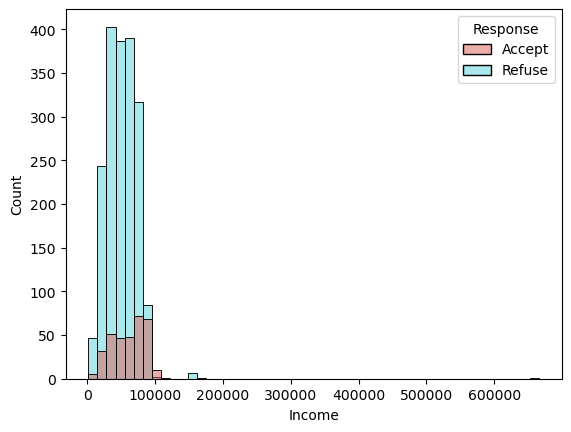

In [29]:
sns.histplot(x = 'Income', hue = 'Response', palette = 'hls',bins=50, data = df)

 **the poeple have highe income they responce to the markting campain** 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [31]:
df['Age']=2023-df['Year_Birth']

In [32]:
df[df.Age>100].Age.values

array([130, 124, 123])

# **what is the age range of poeple the they response to the markting campign**  

<AxesSubplot:xlabel='Age', ylabel='Count'>

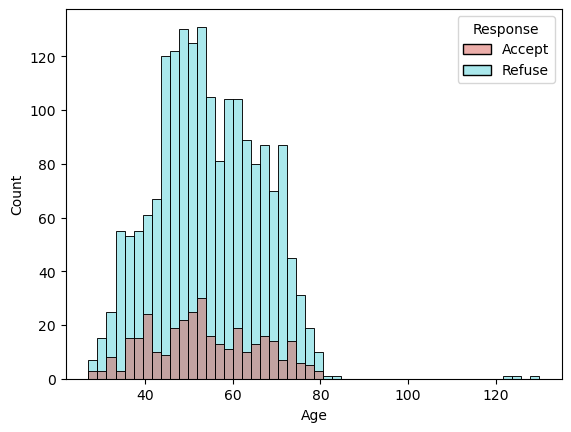

In [33]:
sns.histplot(x = 'Age', hue = 'Response', palette = 'hls',bins=50, data = df)

**the age range is 44 to 48**

# **age range** 

<AxesSubplot:xlabel='Response', ylabel='Age'>

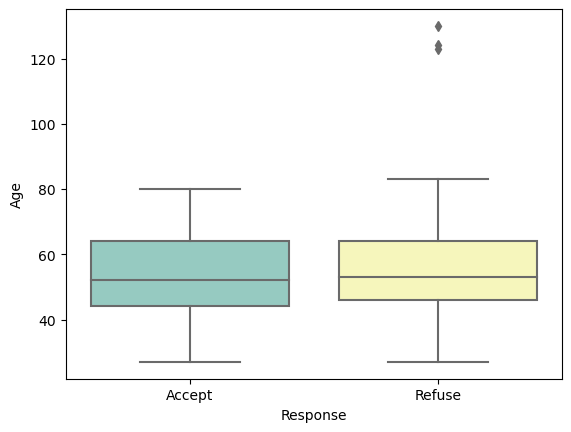

In [34]:
sns.boxplot(y = 'Age',
            x = 'Response',
            palette = "Set3",data = df)

In [35]:
transform_data = data[data.Year_Birth>1923].copy()

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
Education_le = LabelEncoder()
Marital_Status_le =LabelEncoder()

In [38]:
transform_data['Education']=Education_le.fit_transform(transform_data['Education'])
transform_data['Marital_Status']=Marital_Status_le.fit_transform(transform_data['Marital_Status'])

In [39]:
transform_data.drop('Id', axis=1, inplace=True)
transform_data.drop('MntWines', axis=1, inplace=True)

In [40]:
transform_data.drop('Dt_Customer', axis=1, inplace=True)

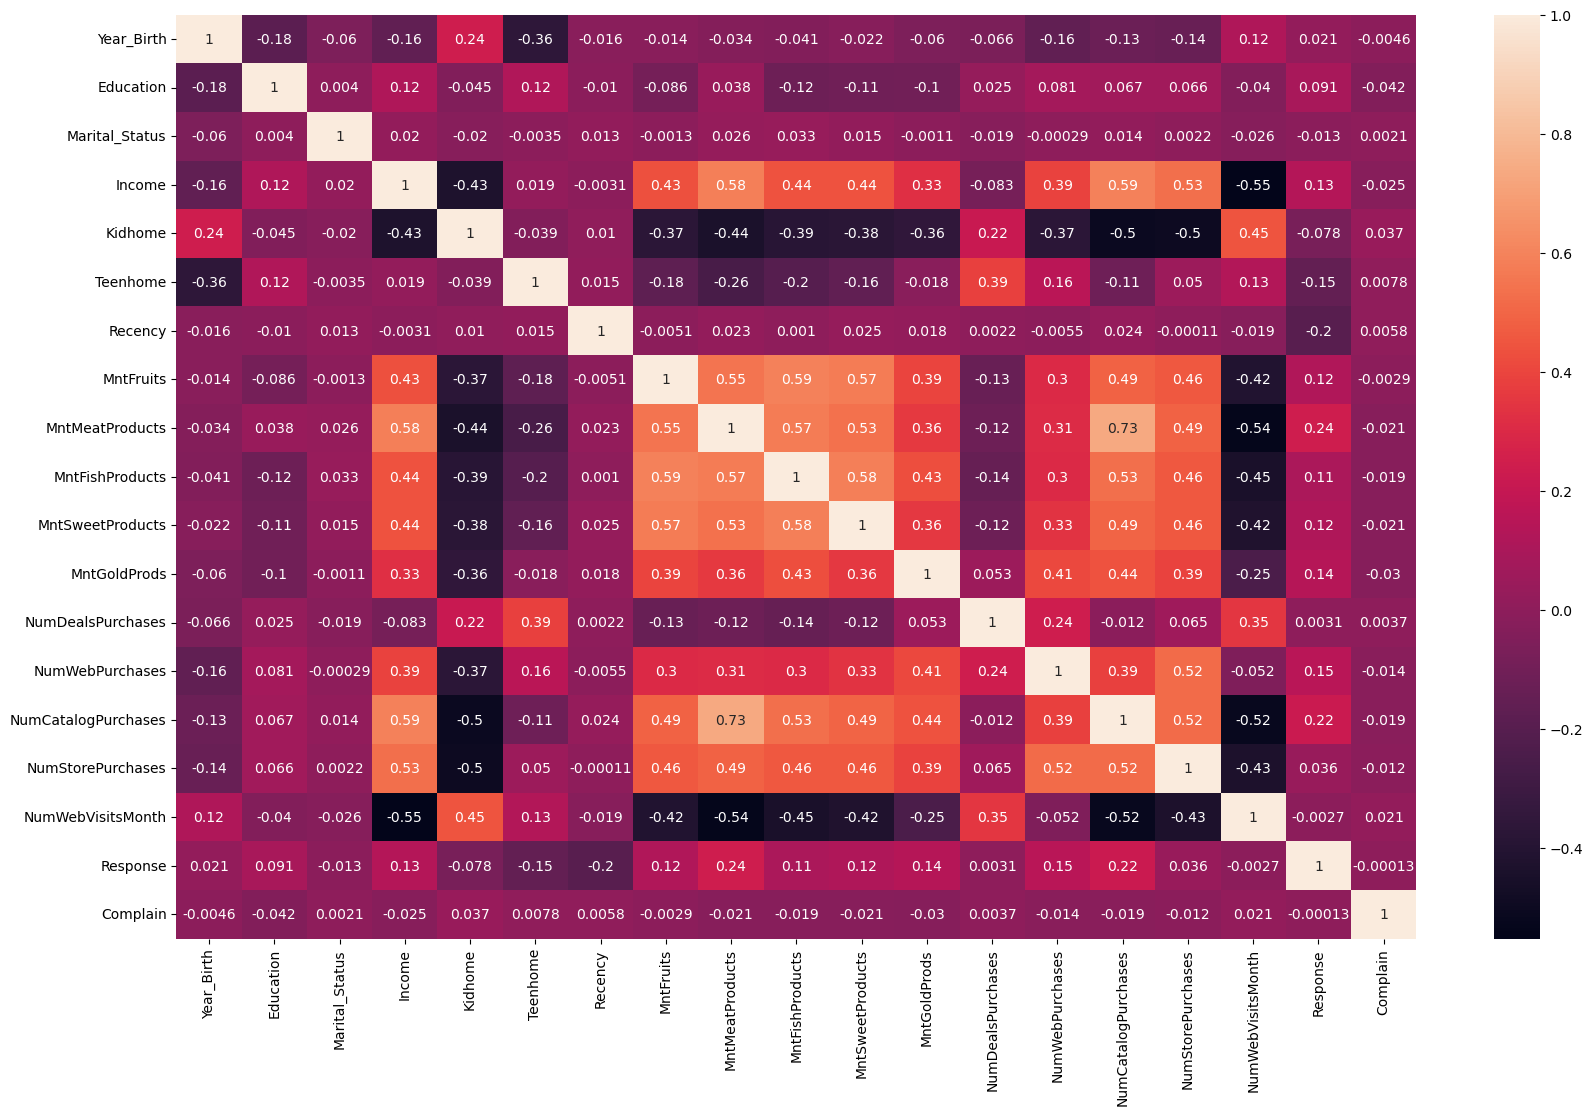

In [41]:
plt.figure(figsize=(20,12))
sns.heatmap(transform_data.corr() , annot = True)
plt.show()

In [42]:
transform_data.corr()["Response"]

Year_Birth             0.020803
Education              0.090506
Marital_Status        -0.012686
Income                 0.133302
Kidhome               -0.078076
Teenhome              -0.154189
Recency               -0.199899
MntFruits              0.123059
MntMeatProducts        0.238059
MntFishProducts        0.108227
MntSweetProducts       0.116165
MntGoldProds           0.141196
NumDealsPurchases      0.003060
NumWebPurchases        0.151148
NumCatalogPurchases    0.219996
NumStorePurchases      0.035720
NumWebVisitsMonth     -0.002678
Response               1.000000
Complain              -0.000127
Name: Response, dtype: float64

In [43]:
x = transform_data.drop("Response" , axis = 1)
y = transform_data['Response']

In [44]:
import warnings

In [45]:
warnings.filterwarnings("ignore")

In [46]:
from sklearn.model_selection import train_test_split

# **imbalancing data** 

In [47]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score , classification_report

In [48]:
from imblearn.over_sampling import SMOTE



# setting up testing and training sets

sm = SMOTE(sampling_strategy='minority')
x_sm ,y_sm = sm.fit_resample(x, y)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_sm ,y_sm ,test_size=0.20, random_state=27)

# **logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression(C=13,max_iter=500,penalty='l2')

In [52]:
lr.fit(x_train, y_train)

LogisticRegression(C=13, max_iter=500)

In [53]:
lr.score(x_train, y_train)

0.7589760638297872

In [54]:
lr.score(x_test, y_test)

0.7553191489361702

In [55]:
print (classification_report(y_test  , lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       383
           1       0.74      0.77      0.75       369

    accuracy                           0.76       752
   macro avg       0.76      0.76      0.76       752
weighted avg       0.76      0.76      0.76       752



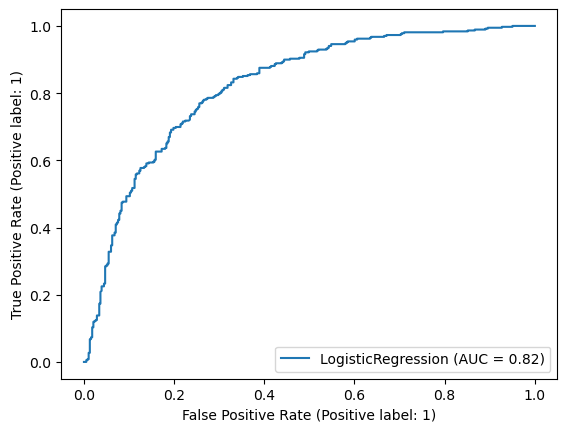

In [56]:
plot_roc_curve(lr, x_test , y_test)

# **KNN**

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn =  KNeighborsClassifier( metric="minkowski"  )

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
pram_grid = dict(n_neighbors=list(range(1, 31)))

In [61]:
grid = GridSearchCV(estimator= knn , param_grid=  pram_grid  , cv = 5)
grid_result = grid.fit(x_train , y_train)

print ("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: 0.781918 using {'n_neighbors': 1}


In [62]:
model = grid_result.best_estimator_
model

KNeighborsClassifier(n_neighbors=1)

In [63]:
print (classification_report(y_test  , model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       383
           1       0.77      0.91      0.83       369

    accuracy                           0.82       752
   macro avg       0.83      0.82      0.82       752
weighted avg       0.83      0.82      0.82       752



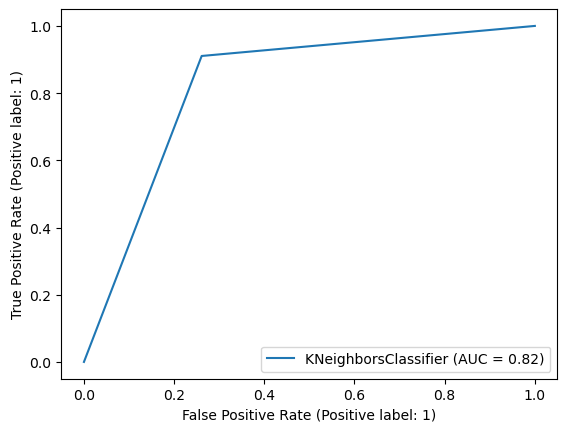

In [64]:
plot_roc_curve(model, x_test , y_test)

# **RandomForest**

In [65]:
from sklearn.ensemble import RandomForestClassifier


In [66]:
pram_grid = {"max_depth": [4,5,3,2] ,"max_features":[3,4,5,2] , 
            "n_estimators" : [200,100,20,30]}

In [67]:
clf = RandomForestClassifier()
grid = GridSearchCV(estimator= clf , param_grid=  pram_grid , cv = 5)
grid_result = grid.fit(x_train , y_train)

print ("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: 0.831446 using {'max_depth': 5, 'max_features': 4, 'n_estimators': 200}


In [68]:
model = grid_result.best_estimator_
model

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200)

In [69]:
print (classification_report(y_test  , model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       383
           1       0.81      0.89      0.85       369

    accuracy                           0.84       752
   macro avg       0.84      0.84      0.84       752
weighted avg       0.85      0.84      0.84       752



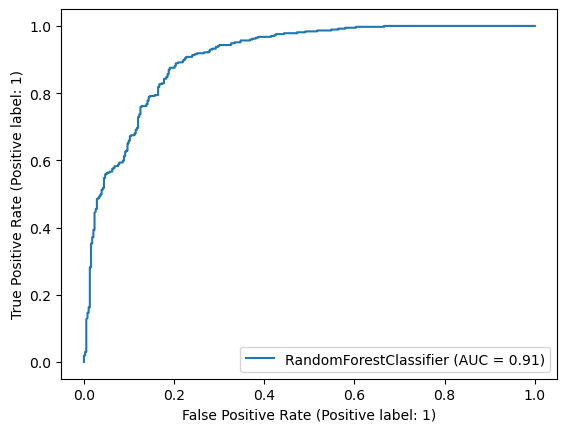

In [70]:
plot_roc_curve(model , x_test , y_test)

# **SVM**

In [71]:
from sklearn.svm import SVC

In [72]:
svc = SVC(probability=True)

In [73]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [74]:
svc.score(x_train,y_train)

0.5947473404255319

In [75]:
svc.score(x_test,y_test)

0.6436170212765957

In [76]:
param_grid = {'C':[1,10],'gamma':[0.001,0.0001] ,'kernel':['rbf']}

In [77]:
grid = GridSearchCV(estimator= svc , param_grid=  param_grid , cv = 5)
grid_result = grid.fit(x_train , y_train)

print ("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: 0.812830 using {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [78]:
model = grid_result.best_estimator_
model

SVC(C=10, gamma=0.0001, probability=True)

In [79]:
print (classification_report(y_test  , model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       383
           1       0.81      0.85      0.83       369

    accuracy                           0.83       752
   macro avg       0.83      0.83      0.83       752
weighted avg       0.83      0.83      0.83       752



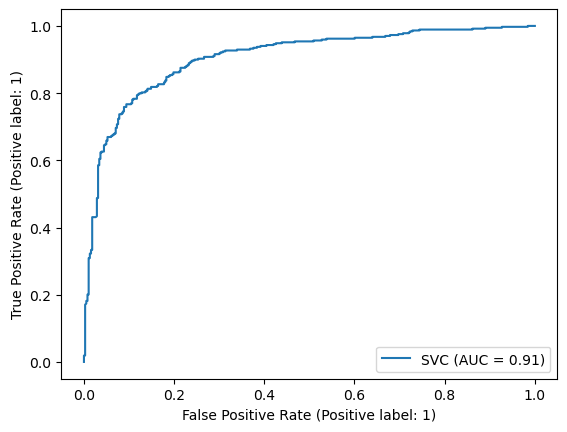

In [80]:
plot_roc_curve(model , x_test , y_test)

# **GaussianNB**

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
gnb = GaussianNB()

In [83]:
gnb.fit(x_train,y_train)
print(gnb.score(x_train,y_train))
print(gnb.score(x_test,y_test))

0.6439494680851063
0.6675531914893617


In [84]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
clf = GridSearchCV(gnb, parameters, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]})

In [85]:
print ("Best: %f using %s" %(clf.best_score_, clf.best_params_))

Best: 0.671545 using {'var_smoothing': 1e-14}


In [86]:
model = clf.best_estimator_
model

GaussianNB(var_smoothing=1e-14)

In [87]:
print (classification_report(y_test  , model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       383
           1       0.65      0.70      0.67       369

    accuracy                           0.67       752
   macro avg       0.67      0.67      0.67       752
weighted avg       0.67      0.67      0.67       752



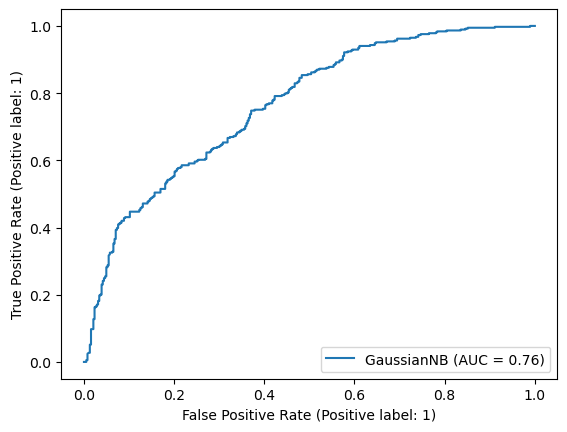

In [88]:
plot_roc_curve(model , x_test , y_test)